For your convenience, the data can be found here again: https://cocl.us/concrete_data. To recap, the predictors in the data of concrete strength include:

Cement
Blast Furnace Slag
Fly Ash
Water
Superplasticizer
Coarse Aggregate
Fine Aggregate


In this project, I will build a regression model using the Keras library to model the data about concrete compressive strength.

### Import the pandas and numpy libraries

In [2]:
import pandas as pd
import numpy as np

In [3]:
## Load the dataset into a pandas dataframe

In [4]:
concrete_data = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0101EN/labs/data/concrete_data.csv')

In [5]:
concrete_data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [6]:
concrete_data.shape

(1030, 9)

1030 is a very small data for training this model. Overfitting is a likely problem to wncounter in this project. I will keep that in mind.

In [7]:
#Are there missing values in the data?
concrete_data.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

So, we have no missing values in the data. Let's get a rough statistics of the data

In [8]:
concrete_data.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


### Split the data into predictors and targets

In [9]:
conc_data_columns = concrete_data.columns

In [10]:
#Get all columns in the concrete_data to be predictors except the "Strength" column
predictors= concrete_data[conc_data_columns[conc_data_columns != 'Strength']]
target = concrete_data['Strength'] #Strength column

In [11]:
#check the first 5 rows of all the features in the predictors
predictors.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [12]:
target.head()

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: Strength, dtype: float64

### Normalize the data
Do this by substracting the mean and dividing by the standard deviation

In [13]:
predictors_norm = (predictors - predictors.mean()) / predictors.std()
predictors_norm.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,0.862735,-1.217079,-0.279597
1,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,1.055651,-1.217079,-0.279597
2,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,3.551340
3,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,5.055221
4,-0.790075,0.678079,-0.846733,0.488555,-1.038638,0.070492,0.647569,4.976069


### Save the number of Predictors

In [14]:
n_cols = predictors_norm.shape[1]
n_cols

8

In [15]:
import keras

Using TensorFlow backend.


In [16]:
#Import the needed libraries for building regression model in keras
from keras.models import Sequential
from keras.layers import Dense

In [30]:
#Define a regression model
def regression_model():
    #create the model
    model = Sequential()
    
    
    #add model layers
    model.add(Dense(32, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1))
    
    #compile model suing MSE as a measure of model performance
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

### Train and Test the Network

In [31]:
#build the model
model = regression_model()
model

## Train and Plot a Visualization of the Training History 

Train on 824 samples, validate on 206 samples
Epoch 1/200
 - 3s - loss: 1631.9322 - val_loss: 1217.5161
Epoch 2/200
 - 0s - loss: 1579.8012 - val_loss: 1169.3015
Epoch 3/200
 - 0s - loss: 1485.8125 - val_loss: 1079.6613
Epoch 4/200
 - 0s - loss: 1308.1795 - val_loss: 928.8770
Epoch 5/200
 - 1s - loss: 1015.1526 - val_loss: 704.7864
Epoch 6/200
 - 1s - loss: 645.0678 - val_loss: 450.3685
Epoch 7/200
 - 0s - loss: 352.5588 - val_loss: 267.2937
Epoch 8/200
 - 0s - loss: 234.7525 - val_loss: 215.8293
Epoch 9/200
 - 0s - loss: 205.4131 - val_loss: 197.1572
Epoch 10/200
 - 0s - loss: 192.0231 - val_loss: 189.3521
Epoch 11/200
 - 0s - loss: 183.3785 - val_loss: 187.3516
Epoch 12/200
 - 0s - loss: 178.0655 - val_loss: 186.4002
Epoch 13/200
 - 1s - loss: 172.1270 - val_loss: 181.3779
Epoch 14/200
 - 1s - loss: 168.5824 - val_loss: 180.3597
Epoch 15/200
 - 3s - loss: 164.7688 - val_loss: 181.8683
Epoch 16/200
 - 2s - loss: 161.7153 - val_loss: 177.6783
Epoch 17/200
 - 0s - loss: 158.5616 - val_l

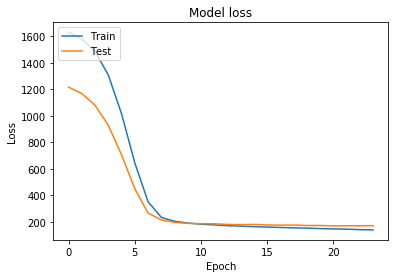

In [32]:
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

#set early stopping monitor so thatthe model stops training when it can no longer improve its performance
early_stopping_monitor = EarlyStopping(patience=3)

#fit the model
history = model.fit(predictors_norm, target, validation_split = 0.2, 
                             epochs=200, 
                             verbose=2, 
                             callbacks=[early_stopping_monitor])

# # Plot training & validation accuracy values
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('Model accuracy')
# plt.ylabel('MSE value')
# plt.xlabel('No. of Epoch')
# plt.legend(['Train', 'Test'], loc='upper left')
# plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()